Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
train_path = '/content/gdrive/MyDrive/Data/Train/'
test_path = '/content/gdrive/MyDrive/Data/Test/'
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
class_names = ['actinic keratosis','basal cell carcinoma','dermatofibroma','melanoma','nevus',
               'pigmented benign keratosis','seborrheic keratosis','squamous cell carcinoma','vascular lesion']
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,seed=123,labels="inferred",image_size=(img_height, img_width),
                            batch_size=batch_size,class_names=class_names,validation_split=0.2,subset="training")

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,seed=123,labels="inferred",image_size=(img_height, img_width),
                            batch_size=batch_size,class_names=class_names,validation_split=0.2,subset="validation")

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
num_classes = 9
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

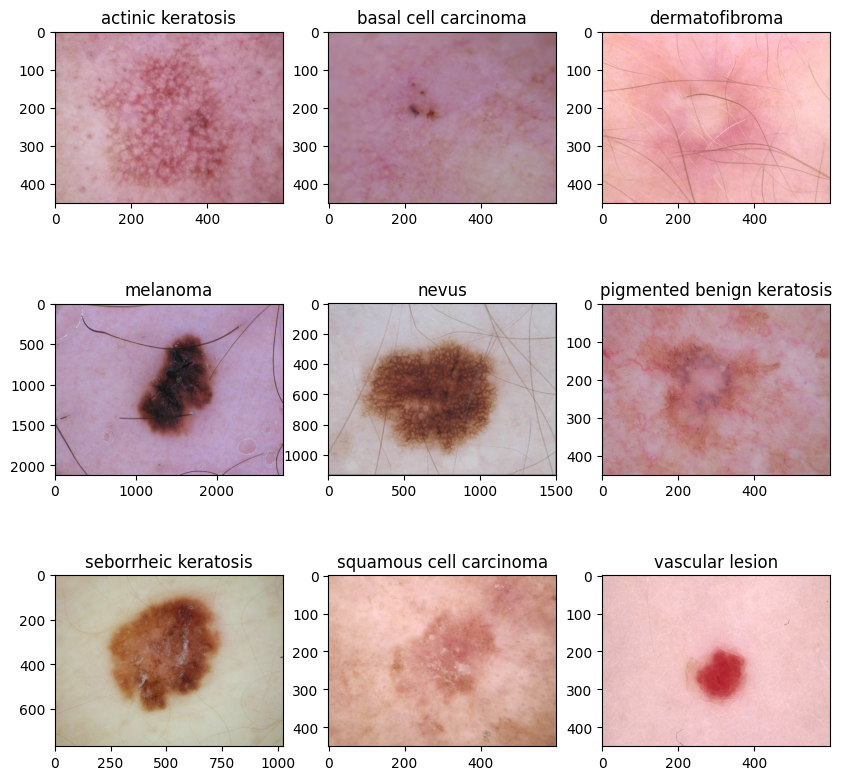

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
# Here we are using SparseCategoricalCrossEntropy as the loss function and adam optimizer
# to this multi class classification problem.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                  

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 81ms/step - loss: 2.0672 - accuracy: 0.1936 - val_loss: 2.0414 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 4s 74ms/step - loss: 2.0158 - accuracy: 0.2210 - val_loss: 1.9907 - val_accuracy: 0.2282
Epoch 3/20
56/56 [==============================] - 4s 74ms/step - loss: 1.9204 - accuracy: 0.2718 - val_loss: 1.8323 - val_accuracy: 0.3289
Epoch 4/20
56/56 [==============================] - 4s 75ms/step - loss: 1.8847 - accuracy: 0.2852 - val_loss: 1.8706 - val_accuracy: 0.2908
Epoch 5/20
56/56 [==============================] - 4s 74ms/step - loss: 1.7564 - accuracy: 0.3610 - val_loss: 1.6341 - val_accuracy: 0.4228
Epoch 6/20
56/56 [==============================] - 4s 73ms/step - loss: 1.6297 - accuracy: 0.4169 - val_loss: 1.6462 - val_accuracy: 0.4094
Epoch 7/20
56/56 [==============================] - 4s 75ms/step - loss: 1.4926 - accuracy: 0.4788 - val_loss: 1.4788 - val_accuracy: 0.4899
Epoch 8/20
56

### Visualizing training results

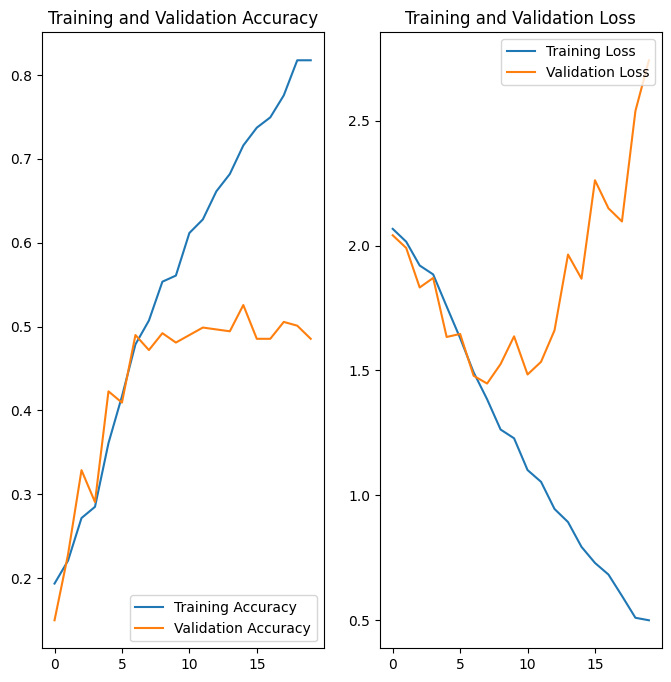

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
- Looking at the final result both visually and statistically, it is clearly evident that the out first base model is highly overfitted. The train accuracy after 20 epochs is above 80% whereas validation accuracy does not cross 50%. And the same reflected in their corresponding loss functions as well.

- For the initial few epochs,train and validation accuracy and loss are similar, but as we move ahead the difference become significant

- We will try with dropout,regularization techniques in the next versions of the model to see if we can overcome the overfitting issue.

- May be 20 epochs is not sufficient. It might need more epochs to understand the pattern of the images. We will try that as well.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_aug = tf.keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

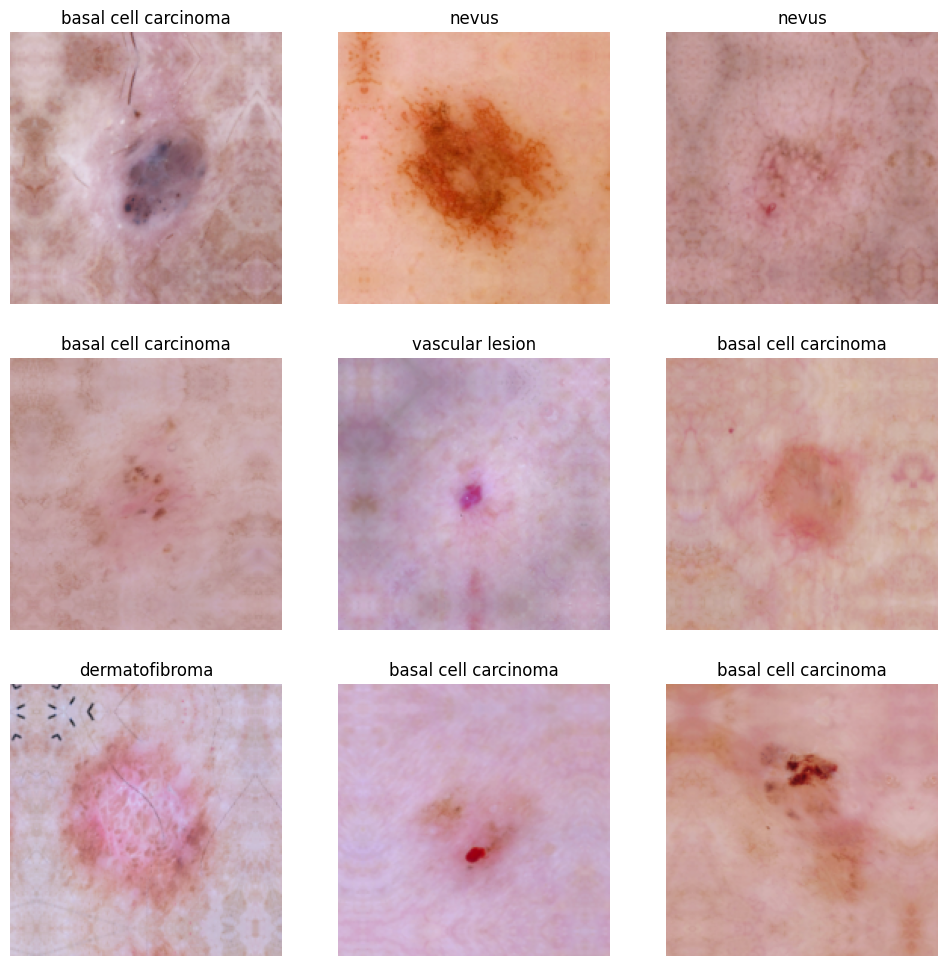

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_aug(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = "softmax"))



### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 9s 110ms/step - loss: 2.0590 - accuracy: 0.2020 - val_loss: 1.9506 - val_accuracy: 0.2841
Epoch 2/20
56/56 [==============================] - 6s 104ms/step - loss: 1.8901 - accuracy: 0.2919 - val_loss: 1.6827 - val_accuracy: 0.4161
Epoch 3/20
56/56 [==============================] - 6s 105ms/step - loss: 1.7227 - accuracy: 0.3845 - val_loss: 1.5882 - val_accuracy: 0.4676
Epoch 4/20
56/56 [==============================] - 6s 103ms/step - loss: 1.5802 - accuracy: 0.4542 - val_loss: 1.5356 - val_accuracy: 0.4653
Epoch 5/20
56/56 [==============================] - 6s 104ms/step - loss: 1.4815 - accuracy: 0.4888 - val_loss: 1.4821 - val_accuracy: 0.4989
Epoch 6/20
56/56 [==============================] - 6s 103ms/step - loss: 1.4493 - accuracy: 0.5073 - val_loss: 1.5157 - val_accuracy: 0.4899
Epoch 7/20
56/56 [==============================] - 6s 104ms/step - loss: 1.4193 - accuracy: 0.4922 - val_loss: 1.4542 - val_accuracy: 0.5056
Epoch 

### Visualizing the results

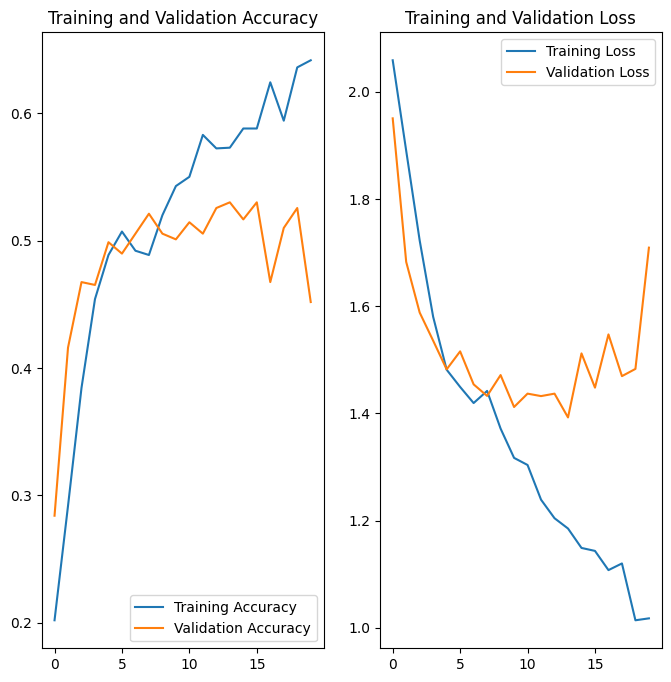

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- Dont see any improvements from model accuracy point of view compare to our base model but overfitting issue is minimized after introducing the Dropout layers.But still model is overfitted. There might be class imbalance. We will look in to that aspect now

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
class_size = {}

for name in class_names:
    class_size[name] = len(list(data_dir_train.glob(name+'/*.jpg')))

class_size

{'actinic keratosis': 114,
 'basal cell carcinoma': 376,
 'dermatofibroma': 95,
 'melanoma': 438,
 'nevus': 357,
 'pigmented benign keratosis': 462,
 'seborrheic keratosis': 77,
 'squamous cell carcinoma': 181,
 'vascular lesion': 139}

In [ ]:
class_df = pd.DataFrame(class_size.items(),index=list(class_size), columns = ['ClassName', 'Number_Of_Samples'])
class_df[['ClassName', 'Number_Of_Samples']]

,ClassName,Number_Of_Samples
actinic keratosis,actinic keratosis,114
basal cell carcinoma,basal cell carcinoma,376
dermatofibroma,dermatofibroma,95
melanoma,melanoma,438
nevus,nevus,357
pigmented benign keratosis,pigmented benign keratosis,462
seborrheic keratosis,seborrheic keratosis,77
squamous cell carcinoma,squamous cell carcinoma,181
vascular lesion,vascular lesion,139


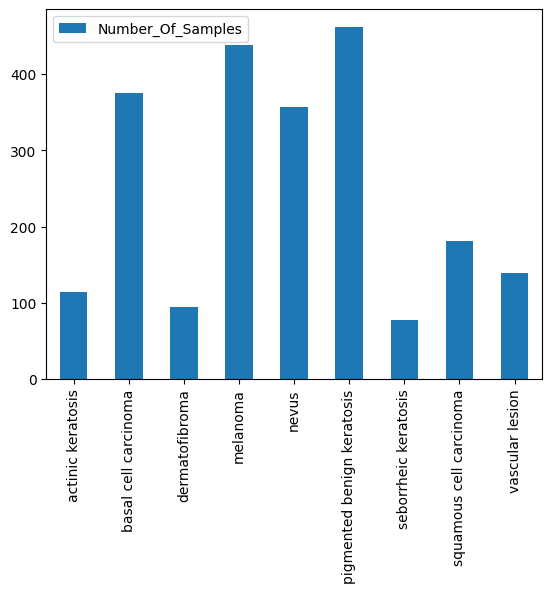

In [ ]:
class_df.plot.bar()
plt.show()

#### **Todo:** Write your findings here:
#### - Seborrheic keratosis is having the lowest distribution
#### - Pigmented Benign keratosis is having the highest distribution of data


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset='/content/gdrive/MyDrive/Data/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Data/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F41B00D67D0>: 100%|██████████| 500/500 [00:30<00:00, 16.54 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Data/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F412B7D0D60>: 100%|██████████| 500/500 [00:28<00:00, 17.79 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Data/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F41243E27D0>: 100%|██████████| 500/500 [00:24<00:00, 20.74 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Data/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F412B780910>: 100%|██████████| 500/500 [01:47<00:00,  4.67 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Data/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F413610CB80>: 100%|██████████| 500/500 [01:49<00:00,  4.58 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Data/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F41243E0A90>: 100%|██████████| 500/500 [00:23<00:00, 21.32 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Data/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F413610CB80>: 100%|██████████| 500/500 [00:50<00:00,  9.98 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Data/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F412B692E90>: 100%|██████████| 500/500 [00:23<00:00, 21.27 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Data/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F41B0049900>: 100%|██████████| 500/500 [00:21<00:00, 22.82 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Data/Train/vascular lesion/output/vascular lesion_original_ISIC_0033458.jpg_9e2d84d6-d4ab-4bd5-b814-18f770c2c651.jpg',
 '/content/gdrive/MyDrive/Data/Train/vascular lesion/output/vascular lesion_original_ISIC_0031270.jpg_77b10921-f094-4487-b2ed-e3187d899975.jpg',
 '/content/gdrive/MyDrive/Data/Train/vascular lesion/output/vascular lesion_original_ISIC_0025596.jpg_da83556f-281b-4b62-aed2-2a5e1fd9a29f.jpg',
 '/content/gdrive/MyDrive/Data/Train/vascular lesion/output/vascular lesion_original_ISIC_0030882.jpg_a6c8bd66-d089-4a7a-9644-9dcf77eac955.jpg',
 '/content/gdrive/MyDrive/Data/Train/vascular lesion/output/vascular lesion_original_ISIC_0026068.jpg_aef05f35-f53d-444f-8765-800a2c0172d8.jpg',
 '/content/gdrive/MyDrive/Data/Train/vascular lesion/output/vascular lesion_original_ISIC_0027888.jpg_712bb8bd-e503-41d1-86f2-eba4c151dc9b.jpg',
 '/content/gdrive/MyDrive/Data/Train/vascular lesion/output/vascular lesion_original_ISIC_0024747.jpg_bcb76f7e-1847-4311-87eb-f167

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
original_df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/Data/Train/vascular le...,vascular lesion
1,/content/gdrive/MyDrive/Data/Train/vascular le...,vascular lesion
2,/content/gdrive/MyDrive/Data/Train/vascular le...,vascular lesion
3,/content/gdrive/MyDrive/Data/Train/vascular le...,vascular lesion
4,/content/gdrive/MyDrive/Data/Train/vascular le...,vascular lesion
...,...,...
4495,/content/gdrive/MyDrive/Data/Train/pigmented b...,pigmented benign keratosis
4496,/content/gdrive/MyDrive/Data/Train/pigmented b...,pigmented benign keratosis
4497,/content/gdrive/MyDrive/Data/Train/pigmented b...,pigmented benign keratosis
4498,/content/gdrive/MyDrive/Data/Train/pigmented b...,pigmented benign keratosis


In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-40-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [ ]:
new_df['Label'].value_counts()

vascular lesion               1000
squamous cell carcinoma       1000
seborrheic keratosis          1000
dermatofibroma                1000
basal cell carcinoma          1000
actinic keratosis             1000
melanoma                      1000
nevus                         1000
pigmented benign keratosis    1000
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
model = Sequential([data_aug,layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,kernel_regularizer=l2(0.01)))
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 30

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 48s 250ms/step - loss: 3.8769 - accuracy: 0.3509 - val_loss: 9.6079 - val_accuracy: 0.1151
Epoch 2/30
169/169 [==============================] - 42s 243ms/step - loss: 2.5327 - accuracy: 0.4434 - val_loss: 5.0163 - val_accuracy: 0.1151
Epoch 3/30
169/169 [==============================] - 42s 244ms/step - loss: 1.9228 - accuracy: 0.4683 - val_loss: 2.6892 - val_accuracy: 0.3259
Epoch 4/30
169/169 [==============================] - 44s 248ms/step - loss: 1.6273 - accuracy: 0.4789 - val_loss: 1.8806 - val_accuracy: 0.4157
Epoch 5/30
169/169 [==============================] - 46s 260ms/step - loss: 1.4765 - accuracy: 0.5072 - val_loss: 1.9232 - val_accuracy: 0.4091
Epoch 6/30
169/169 [==============================] - 42s 244ms/step - loss: 1.3871 - accuracy: 0.5193 - val_loss: 1.6397 - val_accuracy: 0.4514
Epoch 7/30
169/169 [==============================] - 42s 243ms/step - loss: 1.3133 - accuracy: 0.5273 - val_loss: 1.6486 - val_accuracy: 0.4

#### **Todo:**  Visualize the model results

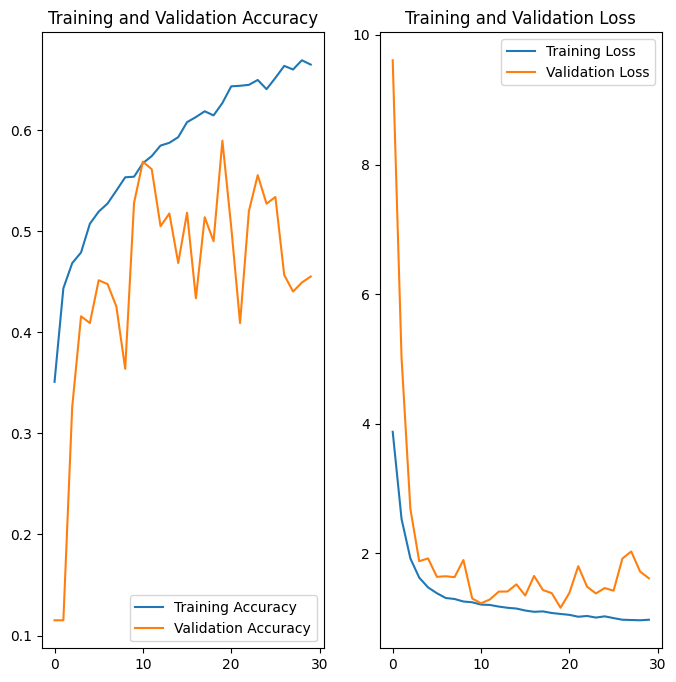

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
- During 10 to 14th epochs,training and validation accuracy and their corresponding loss were very similar but as we move to the further epochs,they again fall apart. Though the training accuracy has a steady growth through out the process,validation accuracy deteriorate towards the end.

- Hence,looking at the stats,we can not say that the overfitting issue was completely eliminated but at the same time we must say its still much better than the previous versions. So definitaly we can say class rebalance helps here.

- Class rebalance helps to generalize the model to some extend so that the gap between training and val accuracy and their corresponding losses are minimized.
